In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('titanic.csv')

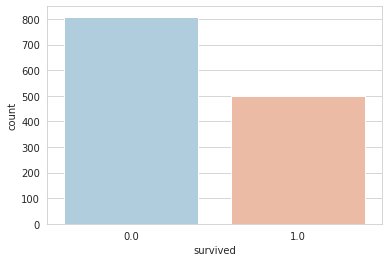

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df, palette='RdBu_r')

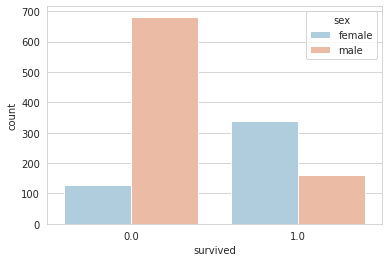

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=df,palette='RdBu_r')

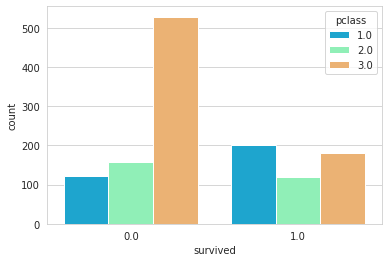

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=df,palette='rainbow')

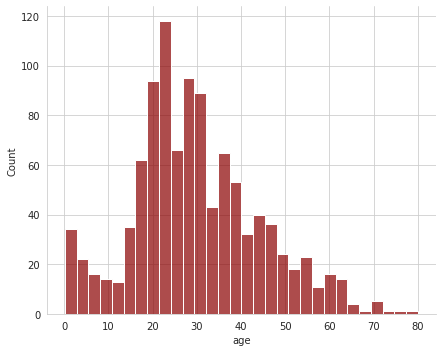

In [7]:
sns.displot(data=df, x=df['age'].dropna(), kde=False, fill=True, color='darkred', bins=30, height=5, aspect=1.25, alpha = 0.7)

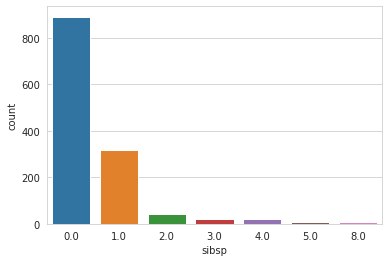

In [8]:
sns.countplot(x='sibsp',data=df)

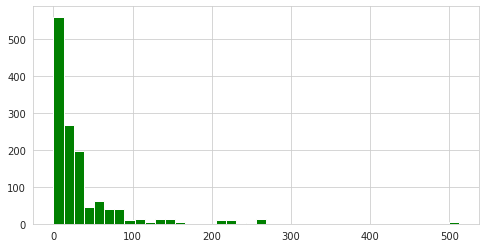

In [9]:
df['fare'].hist(color='green',bins=40,figsize=(8,4))

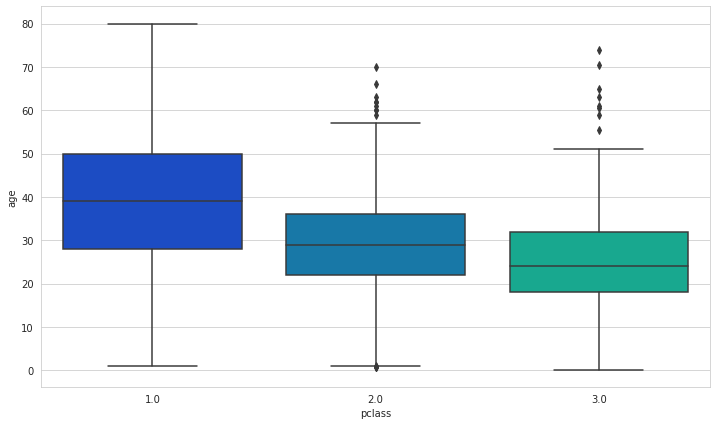

In [10]:
plt.figure(figsize=(12, 7))
bp = sns.boxplot(x='pclass',y='age',data=df,palette='winter')

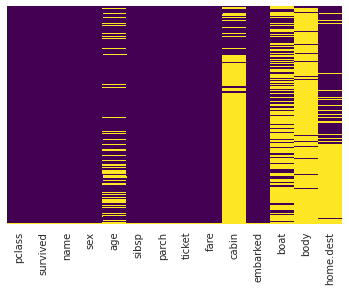

In [13]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False,
            cmap = 'viridis')

In [14]:
medians = df.groupby(['pclass'])['age'].median()
medians

pclass
1.0    39.0
2.0    29.0
3.0    24.0
Name: age, dtype: float64

In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 39

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [20]:
df['age'] = df[['age','pclass']].apply(impute_age,axis=1)

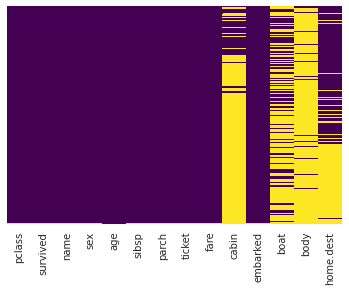

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
df.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1,inplace=True)

In [23]:
df.dropna(inplace=True)

In [24]:
sex = pd.get_dummies(df['sex'],drop_first=True)
embark = pd.get_dummies(df['embarked'],drop_first=True)

In [25]:
df.drop(['sex','embarked','name','ticket'],axis=1,inplace=True)

In [26]:
df = pd.concat([df,sex,embark],axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   float64
 1   survived  1306 non-null   float64
 2   age       1306 non-null   float64
 3   sibsp     1306 non-null   float64
 4   parch     1306 non-null   float64
 5   fare      1306 non-null   float64
 6   male      1306 non-null   uint8  
 7   Q         1306 non-null   uint8  
 8   S         1306 non-null   uint8  
dtypes: float64(6), uint8(3)
memory usage: 75.2 KB


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('survived',axis=1),
                                                    df['survived'], test_size=0.30, 
                                                    random_state=101)

In [29]:
print(len(X_train))
len(X_test)

914


392

In [30]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [32]:
help(tree.DecisionTreeClassifier())
model.fit(X_train, y_train)

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_

DecisionTreeClassifier()

In [33]:
predictions = model.predict(X_test)

In [34]:
#help (tree.DecisionTreeClassifier())

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       247
         1.0       0.73      0.70      0.72       145

    accuracy                           0.80       392
   macro avg       0.78      0.78      0.78       392
weighted avg       0.79      0.80      0.79       392



In [37]:
model.score(X_test, y_test)

0.7959183673469388

In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [46]:
#help(RandomForestClassifier)

In [47]:
model.score(X_test, y_test)

0.7959183673469388

In [48]:
predictions = model.predict(X_test)

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       247
         1.0       0.74      0.70      0.72       145

    accuracy                           0.80       392
   macro avg       0.78      0.78      0.78       392
weighted avg       0.79      0.80      0.79       392



In [50]:
print(confusion_matrix)

<function confusion_matrix at 0x7f00bd4a4710>
